<a href="https://colab.research.google.com/github/nelsonnolasco/Deep-Learning/blob/master/atividade7_denoising_autoencoder_Nelson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluno: Nelson de Campos Nolasco.

Disciplina: Deep Learning.

Professor: Rafael Glater

In [1]:
%tensorflow_version 2.x
%matplotlib inline

In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
def add_noise(data):
   noise = np.random.normal(loc=0.0, scale=0.1, size=data.shape)
   data = data + noise
   return data

train_images_noisy = add_noise(train_images)
test_images_noisy = add_noise(test_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


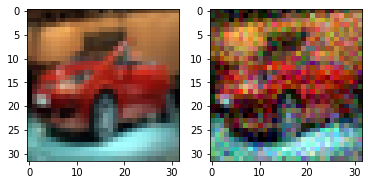

In [6]:
figure, plots = plt.subplots(ncols=2, nrows=1)
plots[0].imshow(train_images[45])
plots[1].imshow(train_images_noisy[45])
plt.show()

In [7]:
def conv_block(x, filters, kernel_size, strides=2):
   x = tf.keras.layers.Conv2D(filters=filters,
              kernel_size=kernel_size,
              strides=strides,
              padding='same', activation='relu')(x)
   return x

def deconv_block(x, filters, kernel_size):
   x = tf.keras.layers.Conv2DTranspose(filters=filters,
                       kernel_size=kernel_size,
                       strides=2,
                       padding='same', activation='relu')(x)
   return x

def denoising_autoencoder():
   dae_inputs = tf.keras.layers.Input(shape=(32, 32, 3), name='dae_input')
   conv_block1 = conv_block(dae_inputs, 32, 3)
   conv_block2 = conv_block(conv_block1, 64, 3)
   conv_block3 = conv_block(conv_block2, 128, 3)
   conv_block4 = conv_block(conv_block3, 256, 3)
   conv_block5 = conv_block(conv_block4, 256, 3, 1)
   
   deconv_block1 = deconv_block(conv_block5, 256, 3)
   merge1 = tf.keras.layers.Concatenate()([deconv_block1, conv_block3])
   deconv_block2 = deconv_block(merge1, 128, 3)
   merge2 = tf.keras.layers.Concatenate()([deconv_block2, conv_block2])
   deconv_block3 = deconv_block(merge2, 64, 3)
   merge3 = tf.keras.layers.Concatenate()([deconv_block3, conv_block1])
   deconv_block4 = deconv_block(merge3, 32, 3)

   final_deconv = tf.keras.layers.Conv2DTranspose(filters=3,
                       kernel_size=3, 
                       padding='same')(deconv_block4)

   dae_outputs = tf.keras.layers.Activation('sigmoid', name='dae_output')(final_deconv)
  
   return tf.keras.Model(dae_inputs, dae_outputs, name='dae')

In [8]:
dae = denoising_autoencoder()
dae.compile(loss='mse', optimizer='adam')

dae.fit(train_images_noisy,
       train_images,
       validation_data=(test_images_noisy, test_images),
       epochs=40,
       batch_size=128)

Epoch 1/40
391/391 [==============================] - 23s 59ms/step - loss: 0.0085 - val_loss: 0.0030
Epoch 2/40
391/391 [==============================] - 23s 58ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 3/40
391/391 [==============================] - 23s 58ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 4/40
391/391 [==============================] - 23s 58ms/step - loss: 0.0022 - val_loss: 0.0022
Epoch 5/40
391/391 [==============================] - 23s 58ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 6/40
391/391 [==============================] - 23s 58ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 7/40
391/391 [==============================] - 23s 58ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 8/40
391/391 [==============================] - 23s 58ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 9/40
391/391 [==============================] - 22s 57ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 10/40
391/391 [==============================] - 22s 57ms/step - loss: 0.002

In [9]:
test_images_denoised = dae.predict(test_images_noisy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


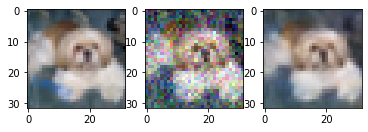

In [10]:
idx = 39
figure, plots = plt.subplots(ncols=3, nrows=1)
plots[0].imshow(test_images[idx])
plots[1].imshow(test_images_noisy[idx])
plots[2].imshow(test_images_denoised[idx])
plt.show()